<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP7/Reduccion_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP6 - Regresión: Boston Housing Prices

Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

El dataset de viviendas de Boston contiene 506 observaciones y 14 variables. El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston y poder predecir los precios a partir de los atributos. Pero antes de ello se realizará un analisis para reducir la dimensionalidad del dataset y determinar cuales variables tienen mayor significancia en el precio final de las viviendas.

## 1. Librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

## 2. Exploración del dataset

In [ ]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**Atributos:**

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centres

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000's

In [ ]:
true_news.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Se observa que existen valores no definidos (null) que deben ser completados. Para resolver este inconveniente se aplicará la técnica de reemplazar dichos campos con el valor medio correspondiente. 

In [ ]:
df1 = true_news.copy()
df1.isnull().sum()
for column in df1:
    if(df1[column].isnull().sum()!=0):
        df1[column]=df1[column].fillna(df1[column].dropna().mean())

#Comprobación si exisen valores "null"
print(np.any(np.isnan(df1)))

False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Histograma de cada atributo**

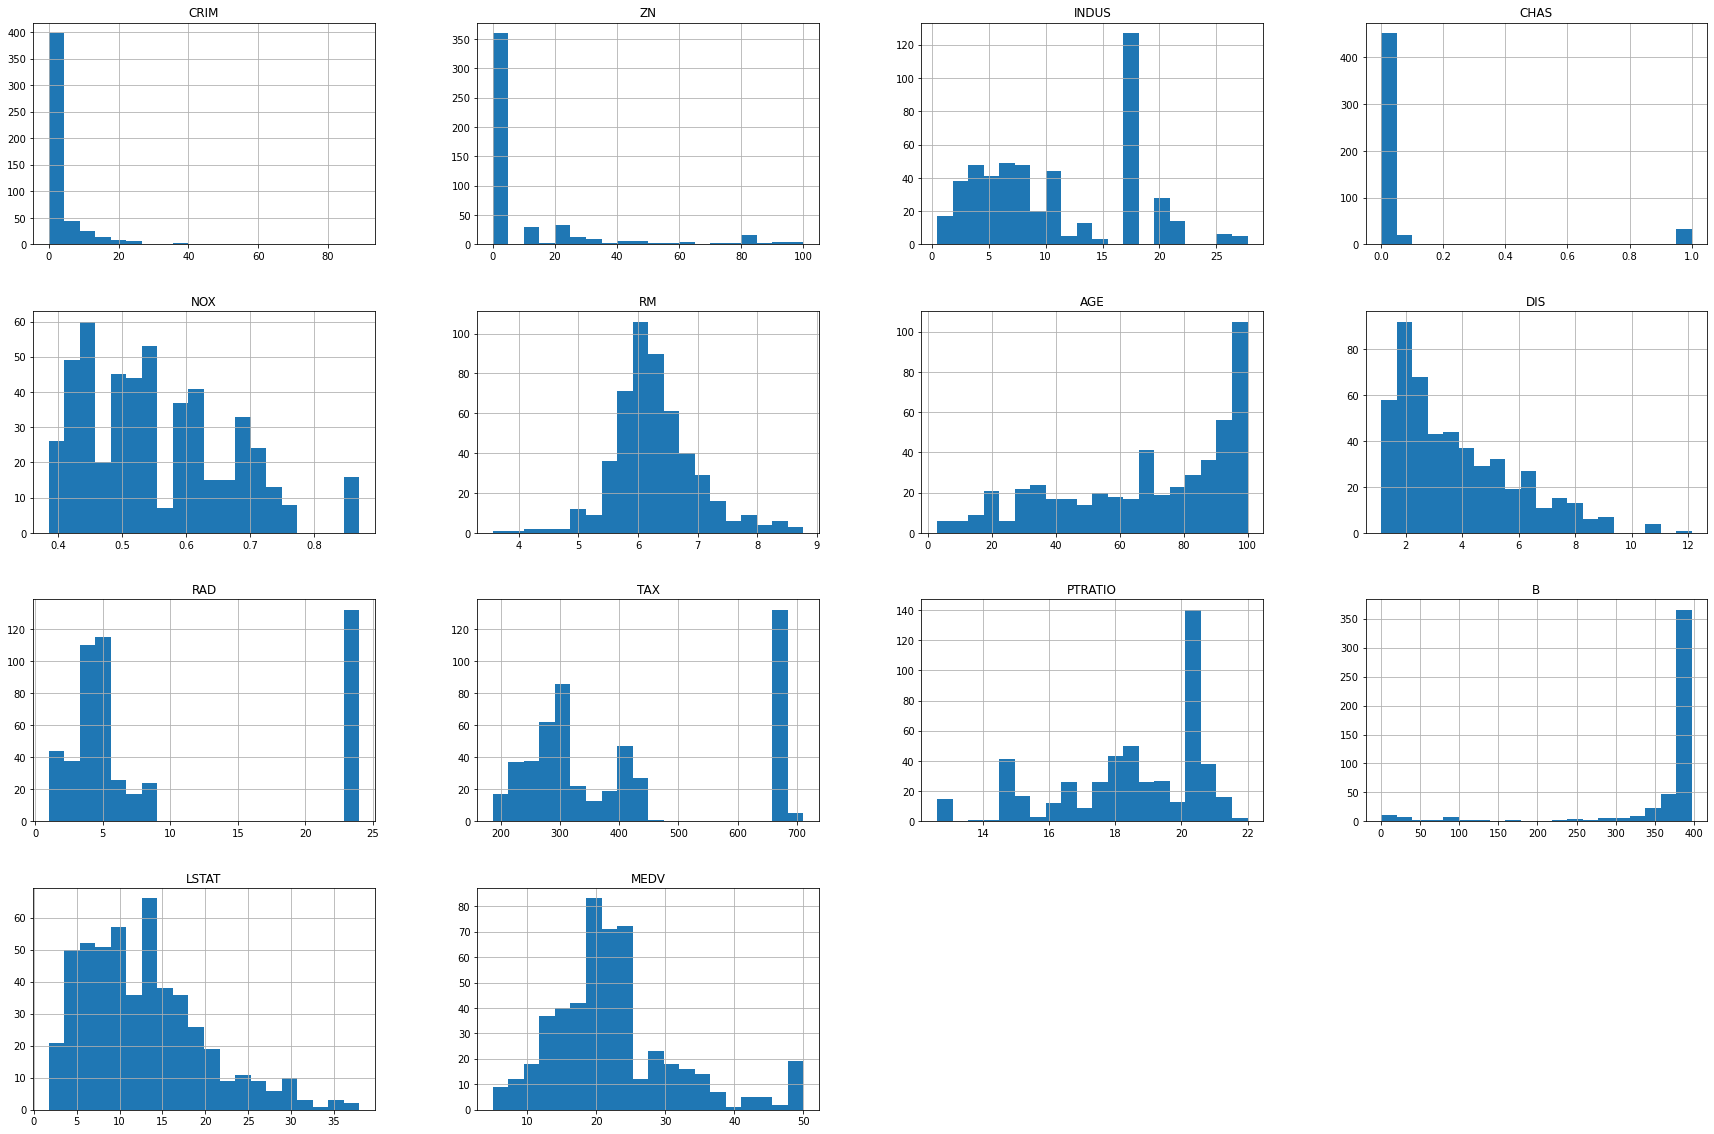

In [ ]:
df1.hist(bins=20,figsize=(30,20))
plt.show()

**Atributos en función del precio**

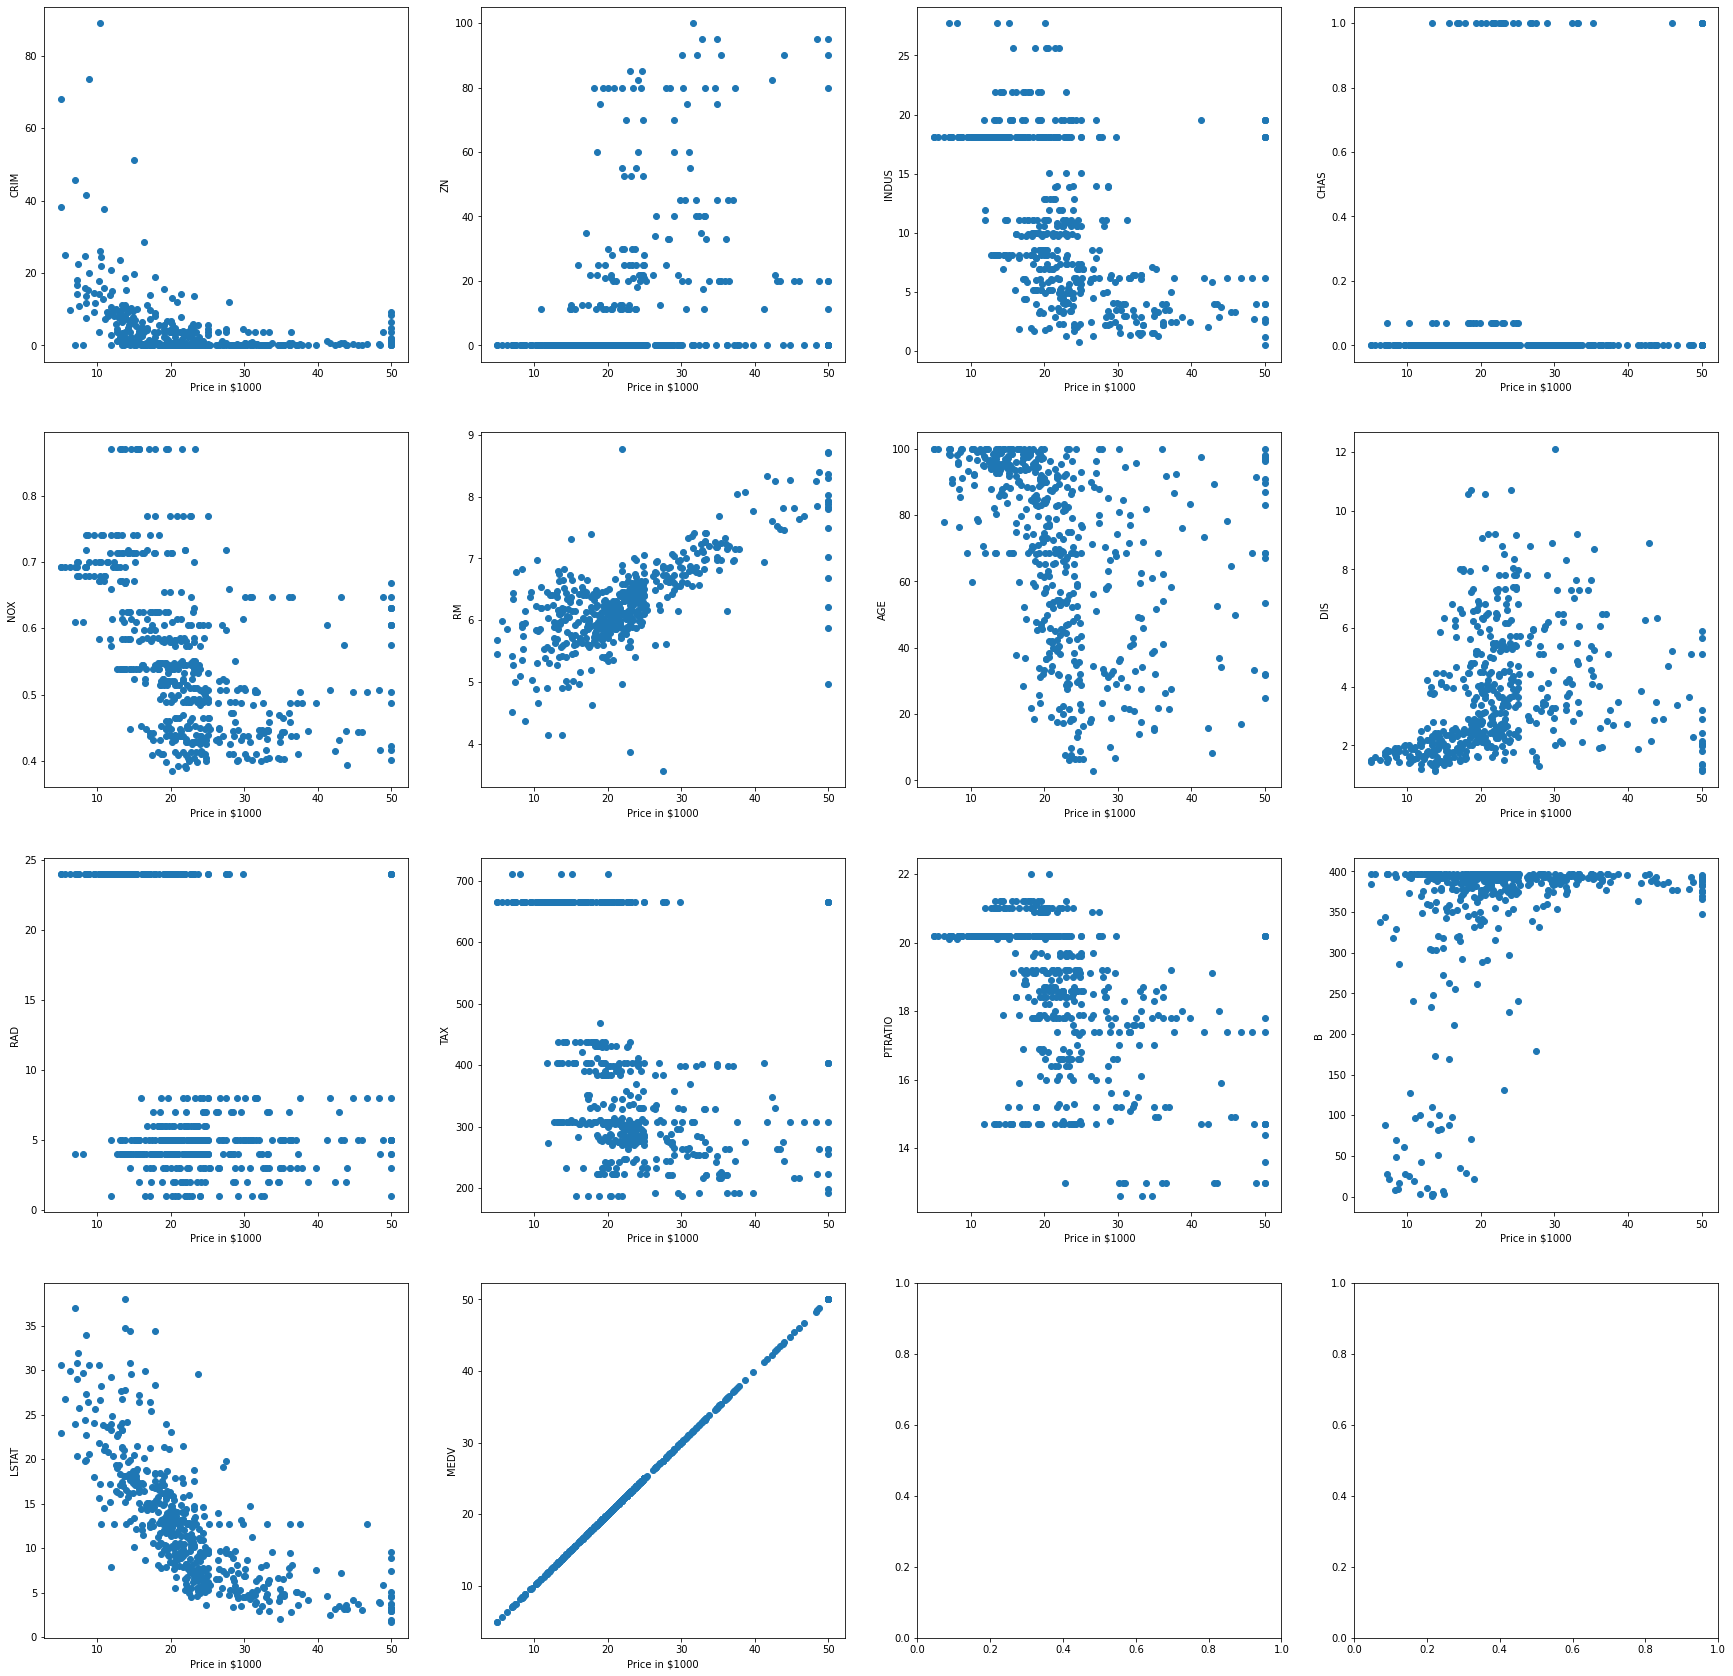

In [ ]:
rows, columns = 4,4
fig, axs = plt.subplots(rows,columns,figsize=(30,30))
k = 0
for i in range(rows):
  for j in range(columns):
    if k <= 13:
      axs[i,j].scatter(y=df1[df1.columns.values[k]], x=df1['MEDV'])
      axs[i,j].set_ylabel(df1.columns.values[k])
      axs[i,j].set_xlabel('Price in $1000')
      k += 1

plt.show()

### Conclusiones del análisis gráfico de datos:

* Se puede observar una cierta correlación lineal positiva entre el precio de las casas y el número de habitaciones de la misma.

* Por otro lado, también se observa una correlación inversa entre el precio de las casas y el menor estatus de la población. A menor precio, mayor es el porcentaje de población con menor estatus.

* Se observa que en aquellas zonas donde hay mayor tasa de crímenes, el precio de la vivienda es menor.

* Se observa que, cuando el índice de accesibilidad a carreteras radiales (RAD) es elevado, el precio de las casas no llega a valores muy elevados, esto podría indicar que las personas prefieren lugares más tranquilos y no tan cerca de dichas carreteras.

* Algo similar se observa en la tasa de impuestos a la propiedad, cuando estos son elevados, el precio no llega a valores muy altos.

* Por último, se observa una cierta correlación entre la distancia ponderada a 5 centros de empleos en Boston y los precios. Cuando las distancias son mas pequeñas se puede apreciar una mayor proporción de casas con precios bajos.

**Correlación entre datos**


In [ ]:
corr=df1.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


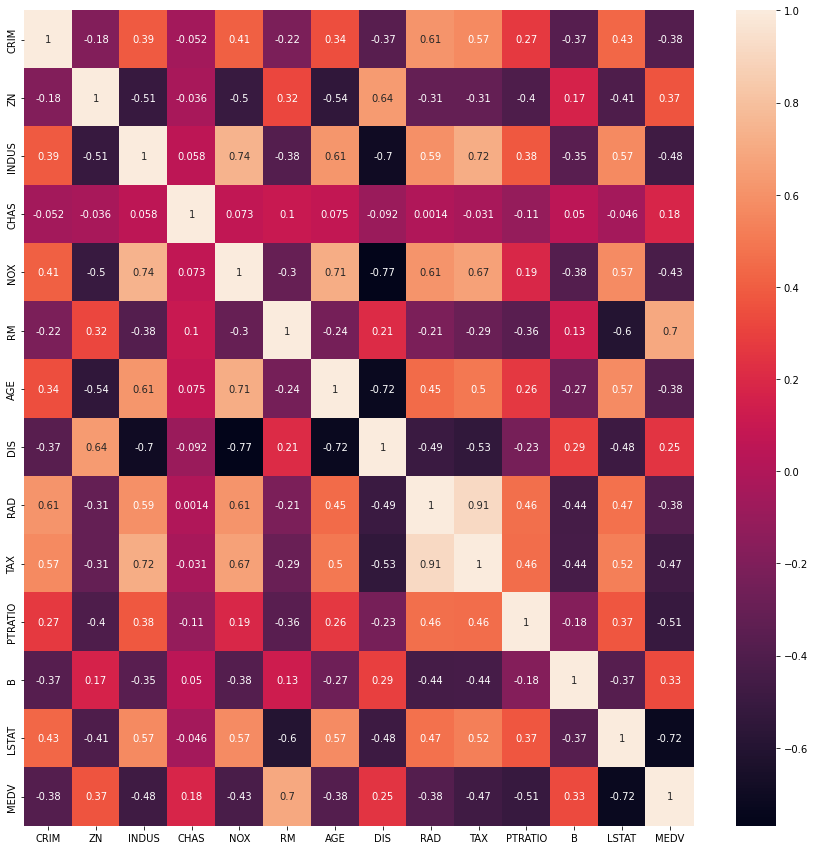

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

Podemos observar que existen atributos bastante correlacionados entre si, por ello, realizar un analisis para reducir la dimensionalidad del dataset y determinar aquellos atributos más representativos. Por último, para determinar la precisión al eliminar ciertos atributos del dataset emplearemos el método de Random Forest estudiado en prácticos anteriores.

## 3. Técnicas de reducción de dimensionalidad

In [ ]:
#Función para separar el dataset en entrenamiento, validación y prueba
def train_validate_test_split(df, train_percent=.6, validate_percent=.2):
    np.random.seed(1)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

### 3.1. Selección de atributos mediante eliminación recursiva de atributos

In [ ]:
#Función para iterar y encontrar el mejor valor de n (número de atributos) para la eliminación recursiva de atributos
def loop_best_n(df1, regressor):
  #Separamos la columna objetivo
  target = df1['MEDV']
  #Para aplicar ExtraTreesClassifier() es necesario que los datos sean enteros,
  #una vez realizada la eliminación recursiva, los datos se vuelven a considerar flotantes.
  target = np.round(target).astype(int)

  #Eliminamos la columna objetivo del dataset
  df2 = df1.drop(['MEDV'], axis=1)
  columnas = list(df2.columns.values)

  accuracy = []

  for n in range(1,12):
    modelo = ExtraTreesClassifier()
    recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
    recursive_delete = recursive_delete.fit(df2, target)

    atrib = recursive_delete.support_
    relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
    relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

    #Dataframe final con las características más importantes
    df3 = df1[relevant_features]

    train, validate, test = train_validate_test_split(df3, 0.8, 0.15)

    X_train = train.iloc[:,:-1]
    y_train = train.loc[:,['MEDV']] #Atributo objetivo: diagnosis

    X_validate = validate.iloc[:,:-1]
    y_validate = validate.loc[:,['MEDV']] #Atributo objetivo: diagnosis

    X_test = test.iloc[:,:-1]
    y_test = test.loc[:,['MEDV']] #Atributo objetivo: diagnosis

    regression = regressor
    regression.fit(X_train, np.ravel(y_train))

    y_pred = regression.predict(X_test)
    accuracy.append(r2_score(y_test, y_pred))

  accuracy = np.array(accuracy)
  x = np.array(range(1,12))
  print(f"Best accuracy: {round(np.max(accuracy)*100,2)}% with n = {np.argmax(accuracy)+1}")
  plt.figure(figsize=(15,10))
  plt.plot(x,accuracy)
  plt.xticks(x)
  plt.xlabel('N')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs N')
  plt.show()


Best accuracy: 96.18% with n = 11


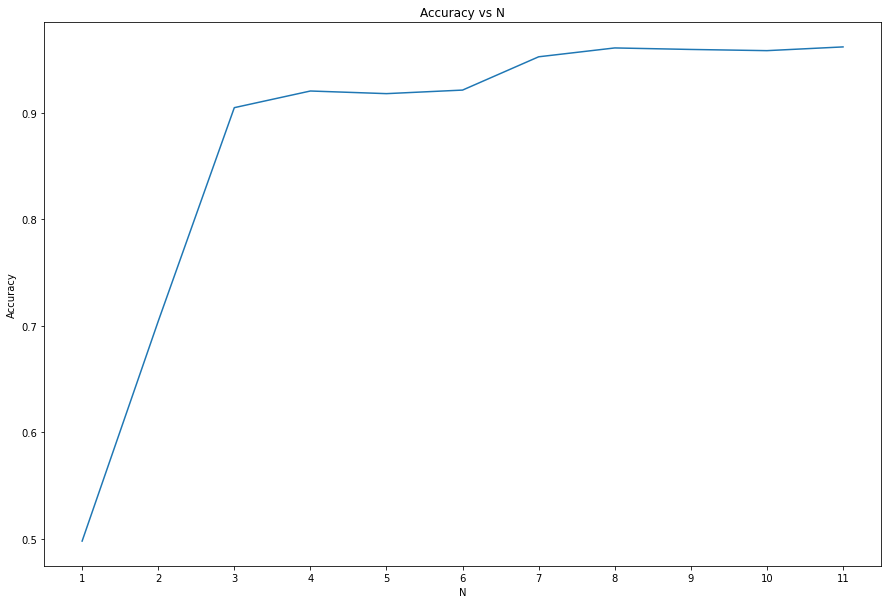

In [ ]:
loop_best_n(df1, RandomForestRegressor())

In [ ]:
#DE ACUERDO AL ANALISIS ANTERIOR, LA MEJOR PRESICIÓN SE OBTUVO CON N entre 7 y 11, tomaremos N = 8

#Separamos la columna objetivo
target = df1['MEDV']
target = np.round(target).astype(int)

#Eliminamos la columna objetivo del dataset
df2 = df1.drop(['MEDV'], axis=1)
columnas = list(df2.columns.values)

n = 8 #Número de atributos a seleccionar
modelo = ExtraTreesClassifier()
recursive_delete = RFE(estimator=modelo, n_features_to_select=n)
recursive_delete = recursive_delete.fit(df2, target)

atrib = recursive_delete.support_
relevant_features = [columnas[i] for i in list(atrib.nonzero()[0])]
relevant_features.append('MEDV') #Volvemos a incluir el atributo target junto con los atributos mas relevantes

#Dataframe final con las características más importantes
df3 = df1[relevant_features]
df3

,CRIM,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.538,6.575,65.200000,4.0900,15.3,396.90,4.980000,24.0
1,0.02731,0.469,6.421,78.900000,4.9671,17.8,396.90,9.140000,21.6
2,0.02729,0.469,7.185,61.100000,4.9671,17.8,392.83,4.030000,34.7
3,0.03237,0.458,6.998,45.800000,6.0622,18.7,394.63,2.940000,33.4
4,0.06905,0.458,7.147,54.200000,6.0622,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.100000,2.4786,21.0,391.99,12.715432,22.4
502,0.04527,0.573,6.120,76.700000,2.2875,21.0,396.90,9.080000,20.6
503,0.06076,0.573,6.976,91.000000,2.1675,21.0,396.90,5.640000,23.9
504,0.10959,0.573,6.794,89.300000,2.3889,21.0,393.45,6.480000,22.0


In [ ]:
train, validate, test = train_validate_test_split(df3, 0.8, 0.15)
print(f"Datos de entrenamiento: {train.shape}")
print(f"Datos de validacion: {validate.shape}")
print(f"Datos de prueba: {test.shape}")

X_train = train.iloc[:,:-1]
y_train = train.loc[:,['MEDV']] #Atributo objetivo

X_validate = validate.iloc[:,:-1]
y_validate = validate.loc[:,['MEDV']] #Atributo objetivo

X_test = test.iloc[:,:-1]
y_test = test.loc[:,['MEDV']] #Atributo objetivo

regression = RandomForestRegressor()
regression.fit(X_train, np.ravel(y_train))

y_pred = regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy:",accuracy*100,"%\n")

#Resultados para 10 datos de prueba
for count, price in enumerate(y_test['MEDV'].iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Datos de entrenamiento: (404, 9)
Datos de validacion: (75, 9)
Datos de prueba: (27, 9)
Accuracy: 96.08295554299899 %

1. Predicted price(x1000): 14.547 - Real price(x1000): 16.3
2. Predicted price(x1000): 15.341 - Real price(x1000): 13.1
3. Predicted price(x1000): 31.489 - Real price(x1000): 29.6
4. Predicted price(x1000): 12.277 - Real price(x1000): 13.1
5. Predicted price(x1000): 14.428 - Real price(x1000): 19.1
6. Predicted price(x1000): 10.055 - Real price(x1000): 12.1
7. Predicted price(x1000): 20.515 - Real price(x1000): 21.7
8. Predicted price(x1000): 22.57 - Real price(x1000): 21.9
9. Predicted price(x1000): 34.024 - Real price(x1000): 33.2
10. Predicted price(x1000): 28.589 - Real price(x1000): 29.9


###3.2. Análisis por componentes principales (PCA)

In [ ]:
#Normalizamos los datos para un mejor analisis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (404, 13)
Datos de prueba: (102, 13)


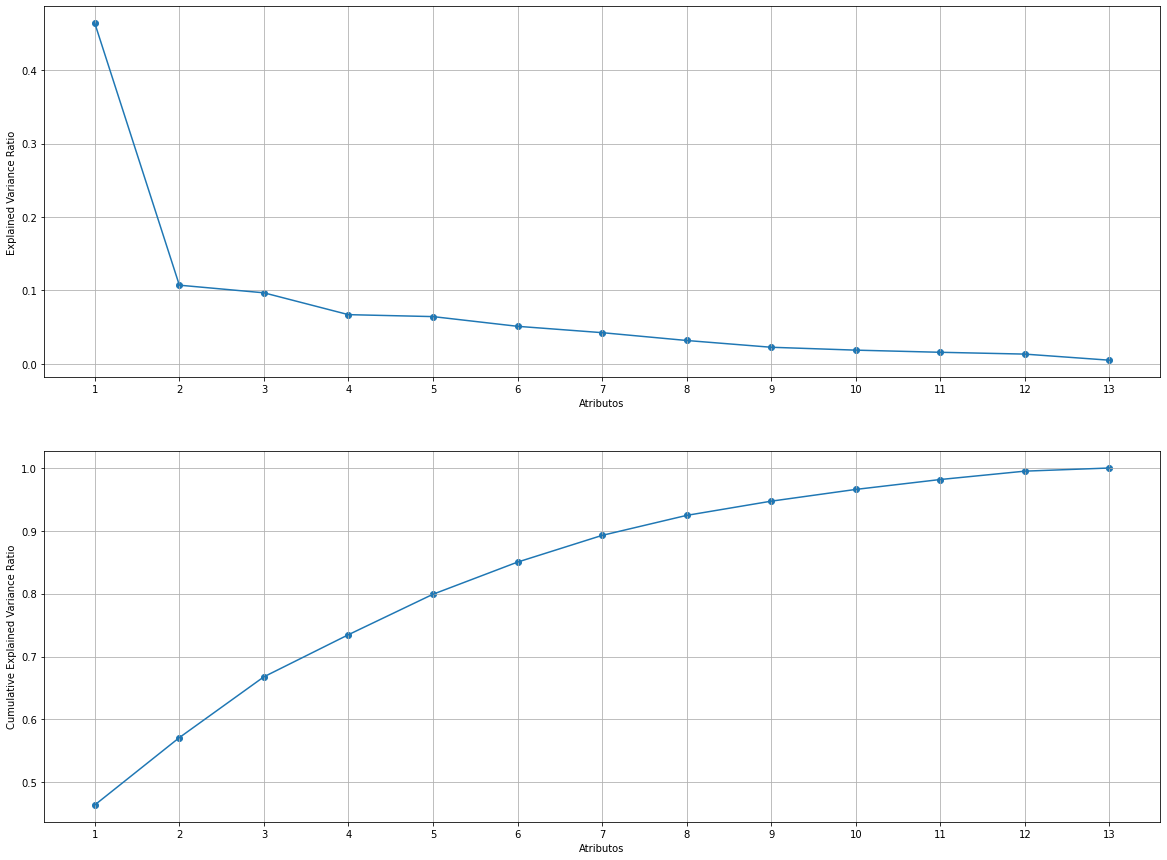

In [ ]:
#Construimos nuestro modelo para evaluar la performance del PCA
pca = PCA()
pca.fit(df_scaled)

bins = np.arange(1, len(df2.columns)+1)
fig, axs = plt.subplots(2,1,figsize=(20,15))

plt.subplot(2,1,1)
plt.scatter(bins, pca.explained_variance_ratio_)
plt.plot(bins, pca.explained_variance_ratio_)
plt.xlabel('Atributos')
plt.ylabel('Explained Variance Ratio')
plt.xticks(bins)
plt.grid()

plt.subplot(2,1,2)
plt.scatter(bins, np.cumsum(pca.explained_variance_ratio_))
plt.plot(bins, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Atributos')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(bins)
plt.grid()

plt.show()

Podemos observar que el Analisis por Componentes Principales (PCA), el cúal proyecta el espacio de atributos sobre un subespacio lineal, nos indica que al emplear 7 atributos podemos representar el dataset en un 90%, lo cual representa un avance bastante significativo, dado que representemos casí la totalidad del dataset empleando solamente la mitad de atributos.

In [ ]:
pca_results = PCA(n_components=7)
pca_fit_train = pca_results.fit_transform(X_train, y_train)
pca_fit_test = pca_results.fit_transform(X_test, y_test)

print(pca_fit_train.shape)
print(pca_fit_test.shape)

(404, 7)
(102, 7)


In [ ]:
#Se evaluará el resultado del modelo a través del método de cross-validation
result = cross_val_score(RandomForestRegressor(), pca_fit_train, y_train)
print(f"Accuracy: {result.mean()*100} %")

regression = RandomForestRegressor()
regression.fit(pca_fit_train, np.ravel(y_train))

y_pred = regression.predict(pca_fit_test)
#Resultados para 10 datos de prueba
for count, price in enumerate(y_test.iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Accuracy: 76.03221163768379 %
1. Predicted price(x1000): 32.56 - Real price(x1000): 20
2. Predicted price(x1000): 26.95 - Real price(x1000): 20
3. Predicted price(x1000): 13.94 - Real price(x1000): 28
4. Predicted price(x1000): 25.89 - Real price(x1000): 47
5. Predicted price(x1000): 33.15 - Real price(x1000): 32
6. Predicted price(x1000): 22.06 - Real price(x1000): 31
7. Predicted price(x1000): 28.62 - Real price(x1000): 26
8. Predicted price(x1000): 17.47 - Real price(x1000): 20
9. Predicted price(x1000): 22.06 - Real price(x1000): 24
10. Predicted price(x1000): 30.74 - Real price(x1000): 21


###3.3. Análisis por Discriminantes Lineales (LDA)

In [ ]:
#Normalizamos los datos para un mejor analisis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (404, 13)
Datos de prueba: (102, 13)


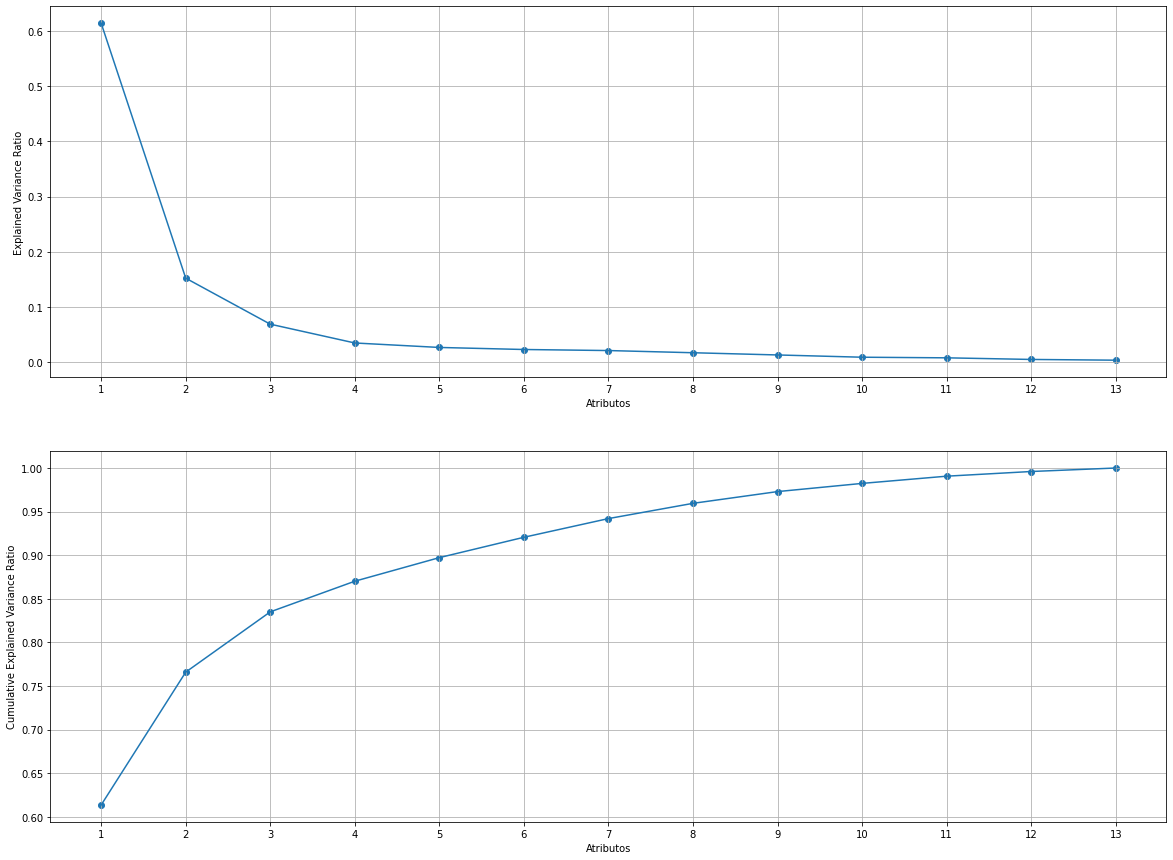

In [ ]:
#Construimos nuestro modelo para evaluar la performance del LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

bins = np.arange(1, len(df2.columns)+1)
fig, axs = plt.subplots(2,1,figsize=(20,15))

plt.subplot(2,1,1)
plt.scatter(bins, lda.explained_variance_ratio_)
plt.plot(bins, lda.explained_variance_ratio_)
plt.xlabel('Atributos')
plt.ylabel('Explained Variance Ratio')
plt.xticks(bins)
plt.grid()

plt.subplot(2,1,2)
plt.scatter(bins, np.cumsum(lda.explained_variance_ratio_))
plt.plot(bins, np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Atributos')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(bins)
plt.grid()

plt.show()

Podemos apreciar como a diferencia del método PCA, empleando LDA con 5 atributos obtenemos un resultado igual al emplear 7 atributos con PCA.

In [ ]:
lda_results = LinearDiscriminantAnalysis(n_components=5)
lda_fit_train = lda_results.fit_transform(X_train, y_train)
lda_fit_test = lda_results.fit_transform(X_test, y_test)

print(lda_fit_train.shape)
print(lda_fit_test.shape)

(404, 5)
(102, 5)


In [ ]:
#Se evaluará el resultado del modelo a través del método de cross-validation
result = cross_val_score(RandomForestRegressor(), lda_fit_train, y_train)
print(f"Accuracy: {result.mean()*100} %")

regression = RandomForestRegressor()
regression.fit(lda_fit_train, np.ravel(y_train))

y_pred = regression.predict(lda_fit_test)
#Resultados para 10 datos de prueba
for count, price in enumerate(y_test.iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Accuracy: 78.16464267897999 %
1. Predicted price(x1000): 26.62 - Real price(x1000): 23
2. Predicted price(x1000): 23.37 - Real price(x1000): 25
3. Predicted price(x1000): 16.21 - Real price(x1000): 14
4. Predicted price(x1000): 12.74 - Real price(x1000): 8
5. Predicted price(x1000): 18.26 - Real price(x1000): 15
6. Predicted price(x1000): 29.47 - Real price(x1000): 29
7. Predicted price(x1000): 15.16 - Real price(x1000): 23
8. Predicted price(x1000): 30.3 - Real price(x1000): 30
9. Predicted price(x1000): 12.26 - Real price(x1000): 15
10. Predicted price(x1000): 17.88 - Real price(x1000): 19


###3.4. t-Stochastic Neighbor Embedding

En este método de reducción de dimensionalidad, mapea el dataset de muy alta dimensionalidad (14 en este caso) a 2D. Para ello, el algoritmo aplica transformaciones no lineales adaptativas a los datos y a diferentes regiones.

In [ ]:
#Normalizamos los datos para un mejor analisis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (404, 13)
Datos de prueba: (102, 13)


In [ ]:
tsne=TSNE(n_components=2) #Tomamos dos componenetes como ejemplo para poder visualizar los resultados
tsne_fit_train = tsne.fit_transform(X_train, y_train)
tsne_fit_test = tsne.fit_transform(X_test, y_test)
print(tsne_fit_train.shape)
print(tsne_fit_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(404, 2)
(102, 2)


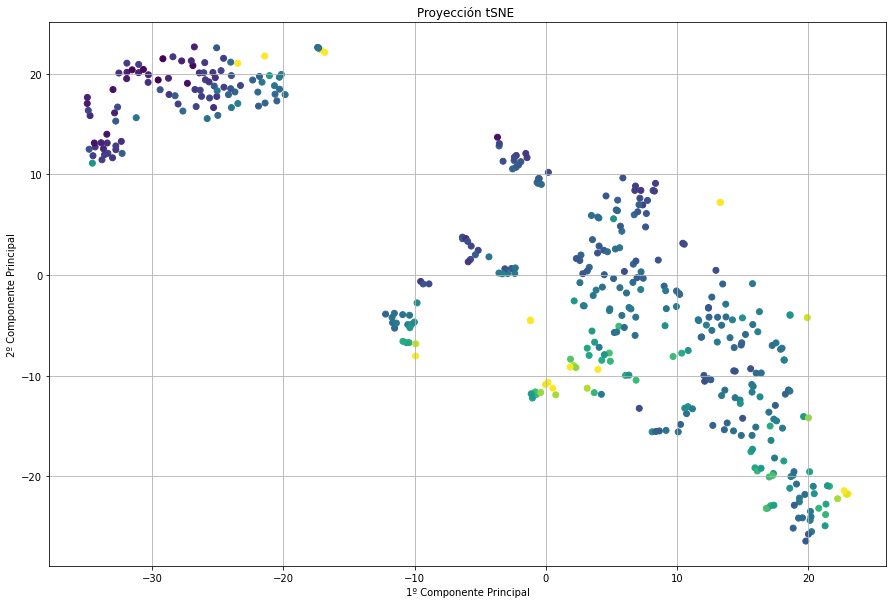

In [ ]:
comp_1 = tsne_fit_train[:, 0]
comp_2 = tsne_fit_train[:, 1]

plt.figure(figsize=(15,10))
plt.scatter(comp_1, comp_2, c=y_train)

plt.title('Proyección tSNE ')
plt.xlabel('1º Componente Principal')
plt.ylabel('2º Componente Principal')

plt.grid()
plt.show()

Se puede apreciar en el gráfico anterior el mapeo del dataset de 14 atributos a un gráfico en dos dimensiones. Esta es una de las principales características y ventajas de este análisis.

In [ ]:
#Se evaluará el resultado del modelo a través del método de cross-validation
result = cross_val_score(RandomForestRegressor(), tsne_fit_train, y_train)
print(f"Accuracy: {result.mean()*100} %")

regression = RandomForestRegressor()
regression.fit(tsne_fit_train, np.ravel(y_train))

y_pred = regression.predict(tsne_fit_test)
#Resultados para 10 datos de prueba
for count, price in enumerate(y_test.iloc[0:10]):
  print(f"{count+1}. Predicted price(x1000): {round(y_pred[count],3)} - Real price(x1000): {price}")

Accuracy: 72.07332428030442 %
1. Predicted price(x1000): 43.06 - Real price(x1000): 34
2. Predicted price(x1000): 32.52 - Real price(x1000): 32
3. Predicted price(x1000): 40.01 - Real price(x1000): 19
4. Predicted price(x1000): 40.38 - Real price(x1000): 35
5. Predicted price(x1000): 35.71 - Real price(x1000): 33
6. Predicted price(x1000): 38.99 - Real price(x1000): 18
7. Predicted price(x1000): 20.86 - Real price(x1000): 15
8. Predicted price(x1000): 30.9 - Real price(x1000): 28
9. Predicted price(x1000): 34.8 - Real price(x1000): 33
10. Predicted price(x1000): 37.25 - Real price(x1000): 19


##4. Conclusiones

* Se pudieron evaluar y probar distintos métodos de reducción de dimensionalidad para dataset con gran cantidad de atributos.

* Si bien todos los métodos se evaluaron empleando un regresor basado en Random Forest para obtener un resultado númerico de esta reducción de dimensionalidad, se podría analizar el comportamiento para los multiples regresores conocidos.

* Para nuestro dataset, sobre el precio de venta de casas en Boston, el método que obtuvo el mayor porcentaje de precisión empleando el regresor basado en Random Forest fue la eliminación recursiva de atributos.

* Además, podemos apreciar que el Análisis por Discriminantes Lineales (LDA) fue el segundo método con mayor precisión, empleando menos atributos para describir el dataset.